In [35]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2022 - accuracy: 0.9408
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0807 - accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0538 - accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9891
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9796
테스트 정확도: 0.9796000123023987


In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [93]:
import cv2

image = cv2.imread("3.jpg")
image_28 = cv2.resize(image, (28, 28))

cv2.imshow("Image", image_28)

cv2.waitKey(0)
cv2.destroyAllWindows()

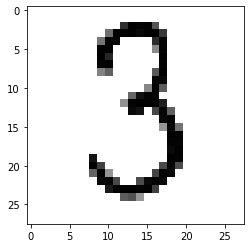

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

#image_28 = 255 - image_28
image_28 = image_28[:,:,0]
image_28 = (image_28 > 125) * image_28
image_28 = image_28.astype('float32') / 255.

plt.imshow(image_28, cmap='Greys', interpolation='nearest');

image_28 = image_28.reshape((1, 28, 28, 1))

In [95]:
print('The Answer is ', model.predict_classes(image_28))

The Answer is  [3]
